<a href="https://colab.research.google.com/github/seantma/ztdl-masterclasses/blob/master/notebooks/Keras_Functional_API_and_Model_Inspection_Sean_ComplexMerge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learn with us: www.zerotodeeplearning.com

Copyright © 2021: Zero to Deep Learning ® Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Keras Functional API and Model Inspection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
url = 'https://raw.githubusercontent.com/zerotodeeplearning/ztdl-masterclasses/master/data/'

In [3]:
df = pd.read_csv(url + 'geoloc_elev.csv')

# we only use the 2 features that matter
X = df[['lat', 'lon']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.2, random_state=0)

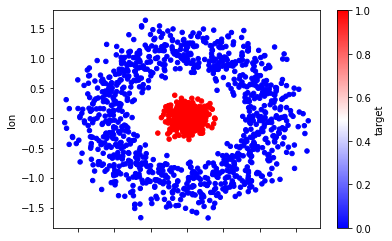

In [4]:
df.plot.scatter(x='lat', y='lon',
                c='target', cmap='bwr');

### Callbacks

In [5]:
import os
import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

In [6]:
outpath="logs/simple"

tensorboard = TensorBoard(outpath, histogram_freq=1)

In [7]:
early_stopper = EarlyStopping(monitor='val_accuracy', patience=10)

In [8]:
fname = os.path.join(outpath, 'weights_epoch_{epoch:02d}_val_acc_{val_accuracy:.2f}.hdf5')
checkpointer = ModelCheckpoint(fname,
                               monitor='val_acc')

In [9]:
model = Sequential([
    Dense(1024, activation='relu', input_shape=(2,)),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.1,
          callbacks=[early_stopper,
                     tensorboard,
                     checkpointer])

Epoch 1/10
9/9 [==============================] - 1s 40ms/step - loss: 0.4737 - accuracy: 0.6593 - val_loss: 0.3955 - val_accuracy: 0.6083
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 0.3010 - accuracy: 0.7037 - val_loss: 0.3111 - val_accuracy: 0.8083
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 0.2476 - accuracy: 0.9139 - val_loss: 0.2812 - val_accuracy: 0.9333
Epoch 4/10
9/9 [==============================] - 0s 15ms/step - loss: 0.2314 - accuracy: 0.9796 - val_loss: 0.2678 - val_accuracy: 0.9833
Epoch 5/10
9/9 [==============================] - 0s 17ms/step - loss: 0.2219 - accuracy: 0.9833 - val_loss: 0.2588 - val_accuracy: 0.9917
Epoch 6/10
9/9 [==============================] - 0s 15ms/step - loss: 0.2137 - accuracy: 0.9935 - val_loss: 0.2501 - val_accuracy: 0.9917
Epoch 7/10
9/9 [==============================] - 0s 12ms/step - loss: 0.2056 - accuracy: 0.9981 - val_loss: 0.2405 - val_accuracy: 0.9917
Epoch 8/10
9/9 [===========

In [12]:
!ls logs/simple

train				    weights_epoch_05_val_acc_0.99.hdf5
validation			    weights_epoch_06_val_acc_0.99.hdf5
weights_epoch_01_val_acc_0.61.hdf5  weights_epoch_07_val_acc_0.99.hdf5
weights_epoch_02_val_acc_0.81.hdf5  weights_epoch_08_val_acc_0.99.hdf5
weights_epoch_03_val_acc_0.93.hdf5  weights_epoch_09_val_acc_0.99.hdf5
weights_epoch_04_val_acc_0.98.hdf5  weights_epoch_10_val_acc_0.99.hdf5


In [13]:
%load_ext tensorboard

In [14]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

### Functional API

In [15]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import plotly.express as px

In [16]:
ins = Input(shape=(2,))
x = Dense(4, activation='tanh')(ins)
x1 = Dense(3, activation='tanh')(x)
outs = Dense(1, activation='sigmoid')(x1)

model = Model(inputs=ins, outputs=outs)

In [17]:
model.compile(optimizer=SGD(learning_rate=0.5), loss='binary_crossentropy', metrics=['accuracy'])

### You can also extract layer weights thru the `Sequential()` method but it is more laborious.

In [25]:
model2 = Sequential([
    Dense(4, activation='tanh', input_shape=(2,)),
    Dense(3, activation='tanh'),
    Dense(1, activation='sigmoid')
])

In [27]:
l = model2.layers[1]

In [28]:
l.get_weights

<bound method Layer.get_weights of <keras.layers.core.Dense object at 0x7f62af3b6dd0>>

In [18]:
model1 = Model(inputs=ins, outputs=x1)

In [19]:
H = model1.predict(X)
px.scatter_3d(x=H[:,0], y=H[:,1],z=H[:,2], color=y)

Fit for 1 epoch only

In [20]:
model.fit(X_train, y_train,
          verbose=0,
          validation_split=0.1);

In [21]:
H = model1.predict(X)
px.scatter_3d(x=H[:,0], y=H[:,1],z=H[:,2], color=y)

Add more epochs

In [22]:
model.fit(X_train, y_train,
          verbose=1,
          epochs=5,
          validation_split=0.1)

Epoch 1/5
34/34 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7176 - val_loss: 0.4757 - val_accuracy: 0.8583
Epoch 2/5
34/34 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8602 - val_loss: 0.4238 - val_accuracy: 0.7250
Epoch 3/5
34/34 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9361 - val_loss: 0.1434 - val_accuracy: 1.0000
Epoch 4/5
34/34 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9972 - val_loss: 0.0736 - val_accuracy: 1.0000
Epoch 5/5
34/34 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9991 - val_loss: 0.0484 - val_accuracy: 1.0000


In [23]:
H = model1.predict(X)
px.scatter_3d(x=H[:,0], y=H[:,1],z=H[:,2], color=y)

### Exercise 1

Let's separate two True from False banknotes and look how the model learns the inner representation.

- Load the `banknotes.csv` dataset into a pandas dataframe
- Inspect it using Seaborn Pairplot
- Separate features from labels. Labels are contained in the class column
- Split data into train and test sets, using a 30% test size and `random_state=42`
- Create a model using the functional api with the following architecture:

        Input: 4 features
        Inner layer: 2 nodes, relu activation
        Output layer: 1 node, sigmoid

- Compile the model but don't train it yet
- Create an additional model, called `model1` that has the same input but has the inner layer as output



In [31]:
df = pd.read_csv(url + 'banknotes.csv')
df.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [33]:
df['class'].unique()

array([0, 1])

In [ ]:
sns.pairplot(data=df, x_vars=features, y_vars='target')

In [ ]:
ins = Input(shape=(4,))
x = Dense(2, activation='relu')(ins)
outs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=ins, outputs=outs)

### Exercise 2: Tensorboard callbacks & training

- Re-initialize the output path to `logs/banknotes`
- Create a new instance of a TensorboardCallback that logs training data to that path
- Set the model weights to the initial weights provided below using  `model.set_weights`
- Train the model and see if you can get to a high accuracy
    - remember to add the callback to the `.fit` method
- Inspect the progress of the training with Tensorboard

In [ ]:
weights = [np.array([[-0.26285839,  0.82659411],
                     [ 0.65099144, -0.7858932 ],
                     [ 0.40144777, -0.92449236],
                     [ 0.87284446, -0.59128475]]),
           np.array([ 0.,  0.]),
           np.array([[-0.7150408 ], [ 0.54277754]]),
           np.array([ 0.])]

### Exercise 3: Inner layer inspection

- Reset once again the model weights to the initial weights provided above
- Train the model one epoch at a time, and at each epoch visualize the test data as it appears at the output of auxiliary `model1` output, using a 2D scatter plot
- You should see model gradually learn to separate the 2 classes